# Do Not Delete!

In [17]:
# DO NOT REMOVE THESE
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
# DO NOT REMOVE This
%reload_ext autoreload

In [19]:
## DO NOT REMOVE
## import local src module -
## src in this project will contain all your local code
## clean_data.py, model.py, visualize.py, custom.py

#import src.base with alias to avoid namespace clashes

from src import base as fis

In [20]:
fis.test_base()

Base Module Imported

Testing local imports
In clean_data
In Model
In Visualize
In custom module


# Import Libraries

In [21]:
# Dataframes
import pandas as pd
import numpy as np

# Graphing
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Data Profiling
import pandas_profiling

# Data Preparation
    # Train:Test
from sklearn.model_selection import train_test_split
    # Normalize
from sklearn.preprocessing import normalize
    # Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
    # GridSearch
from sklearn.model_selection import GridSearchCV
    # PCA
from sklearn.decomposition import PCA
    
# KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from scipy.spatial import distance

# Random Forest
from sklearn.tree import DecisionTreeClassifier  # Decision Tree
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier  #Bagging & Random Forest
from sklearn import tree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
    # Visuals for Random Forest
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

# Logistic Regression
    # SK-learn
from sklearn.linear_model import LogisticRegression
    # Statsmodel
import statsmodels.api as sm
from patsy import dmatrices



# Data Importing

In [8]:
pwd

'/Users/flatironschool/BootCamp/Mod_5_Project/mod_5_project/notebooks'

In [33]:
csv_name = 'creditcard.csv'

df = pd.read_csv('/Users/flatironschool/BootCamp/Mod_5_Project/mod_5_project/data/raw/creditcard.csv')

# Data Cleaning

In [34]:
# Adam's Code

# overall look
df.head()
df.shape
df.columns

# values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
Time      284807 non-null float64
V1        284807 non-null float64
V2        284807 non-null float64
V3        284807 non-null float64
V4        284807 non-null float64
V5        284807 non-null float64
V6        284807 non-null float64
V7        284807 non-null float64
V8        284807 non-null float64
V9        284807 non-null float64
V10       284807 non-null float64
V11       284807 non-null float64
V12       284807 non-null float64
V13       284807 non-null float64
V14       284807 non-null float64
V15       284807 non-null float64
V16       284807 non-null float64
V17       284807 non-null float64
V18       284807 non-null float64
V19       284807 non-null float64
V20       284807 non-null float64
V21       284807 non-null float64
V22       284807 non-null float64
V23       284807 non-null float64
V24       284807 non-null float64
V25       284807 non-null float64
V26  

In [ ]:
#more general info about data frame
#not used for credit card info as all the values are numbers, no nulls, objects, etc.
df['col1'] = df['col1'].astype(float) #change dtype
df.isna().sum().sort_values(ascending=False) #sorted na values
df.describe()
for column in df.columns:
    print(df[column].value_counts())
  # replace weird values
df['col1'] = df['col1'].replace('?',np.nan)
  # get dummies
pd.get_dummies(df['col1'],prefix='col1',prefix_sep='_', axis=1)

In [ ]:
# Data Profiling
df = pd.DataFrame(
    np.random.rand(100, 5),
    columns=['a', 'b', 'c', 'd', 'e']
)

# Get the report
df.profile_report()

# retrieve the list of variables which are rejected due to high correlation:
profile = df.profile_report()
rejected_variables = profile.get_rejected_variables(threshold=0.9)

# If you want to generate a HTML report file, save the ProfileReport to an object and use the to_file() function:
profile = df.profile_report(title='Pandas Profiling Report')
profile.to_file(output_file="output.html")

# Make Time Variables

There is a pattern in the Time variable, which is in seconds since the start of the file. There is clearly a drop-off of credit card transactions in what we assumed was the middle of the night. We divided the time period which covers two and a quarter days, into four periods, which start at 1 pm. 

In [23]:
#creating the four time periods
secs_per_day = 86400
secs_per_hour = 3600
start = 3600 #1am
period1 = start + 3600*6 #1-7am
period2 = period1 + 3600*6 #7am-1pm
period3 = period2 + 3600*6 #1pm-7pm
period4 = period3 + 3600*5 #7am-12am


In [24]:
#adding a new column to the data frame for the time periods
df['time_of_day']=df['Time'].apply(lambda x: x - secs_per_day if x >= secs_per_day else x)

In [25]:
#adding the time periods as a number
df['time_of_day'][(df['time_of_day']<start)] = 3
df['time_of_day'][(df['time_of_day']>=start) & (df['time_of_day']<period1)] = 0
df['time_of_day'][(df['time_of_day']>=period1) & (df['time_of_day']<period2)] = 1
df['time_of_day'][(df['time_of_day']>=period2) & (df['time_of_day']<period3)] = 2
df['time_of_day'][(df['time_of_day']>=period3)] = 3

## Drop Duplicates

In [26]:
df = df.drop_duplicates(inplace = True)

## Get Dummies

In [ ]:
    # Get dummies for the columns we're interested if
x_feats = ['col1', 'col2', 'col3']
X = pd.get_dummies(df[x_feats])
y = df.target

## Fill Null values

In [ ]:
X = X.fillna(value=0)

## Normalize Data

## Train-Test Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Save cleaned dataframe

In [ ]:
# Save our cleaned dataframe to cleaned_dataframe.csv
df.to_csv('../data/processed/cleaned_dataframe.csv')

In [ ]:
df_cleaned = pd.read_csv('../data/processed/cleaned_dataframe.csv')

# Data Visualization

In [ ]:
# Save the model as a png file
png_filename = NONE.png
plt.savefig('../reports/figures/{}'.format(png_filename), bbox_inches='tight')

# Dimensionality Reduction through PCA

In [ ]:
df_pca = df_cleaned.copy()

In [ ]:
# Adam's Code
pca = PCA(n_components=2)  #ncomponents are your number of variables that your trying to keep, they're not your target variables
pca.fit(X)

print(pca.components_)
# This tells us the variance explained by each line (keep the greater one)
print(pca.explained_variance_)  #nb that this is the percentage explained of total, they wont add up to 1

# Show the vectors on a scatter plot of the variables
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0)
    ax.annotate('', v1, v0, arrowprops=arrowprops)
    # plot data
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.axis('equal');

# Using PCA to reduce dimensionality
pca = PCA(n_components=2)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)
    # visual to show the dimensionality reduction
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

# Naive Bayes

In [ ]:
df_n_bayes = df_cleaned.copy()

## Gaussian Bayes

In [ ]:
# For continous
df_g_bayes = df_cleaned.copy()

# KNN

In [ ]:
df_knn = df_cleaned.copy()

In [ ]:
# Adam's Code

# Scale first

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

# Predict and show accuracy
    # make class predictions for the testing set
y_pred_class = knn.predict(X_test)
    # calculate accuracy
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

# F1 score by K values + visualization for k Scores
import matplotlib.pyplot as plt
def f1_by_k_value(X_train, y_train, X_test, y_test, krange_min=1,krange_max=50):
    '''calculate the F1 score by k-value and plot a visualization'''
    # Build list of k-scores
    k_range = list(range(krange_min, krange_max))
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        y_predict = knn.predict(X_test)
        score = metrics.f1_score(y_test, y_predict, average='weighted')
        k_scores.append( score)
    # Plot
    plt.figure(figsize=(12, 6))
    plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',
             markerfacecolor='blue', markersize=10)
    plt.title('F1 score by K Value')
    plt.xlabel('K Value')
    plt.ylabel('F1 Score')
    plt.show()

# Get the accuracy
knn = KNN()
knn.fit(X_train, y_train)
preds = knn.predict(X_test)
print("Testing Accuracy: {}%".format(round(accuracy_score(y_test, preds),4)*100))

# K-means

In [ ]:
df_kmeans = df_cleaned.copy()

# Logistic Regression

In [ ]:
df_log_reg = df_cleaned.copy()

In [ ]:
# Adam's code for SKlearn

# Get dummies for the columns we're interested if
x_feats = ['col1', 'col2', 'col3']
X = pd.get_dummies(df[x_feats])
y = df.target
    # Fill null values
X = X.fillna(value=0)
    # Normalize data
for col in X.columns:
    X[col] = (X[col]-min(X[col]))/ (max(X[col]) - min(X[col])) #We subtract the minimum and divide by the range forcing a scale of 0 to 1 for each feature
    # Train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
    # Fit model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept = False, C = 1e12)
model_log = logreg.fit(X_train, y_train)
model_log
    # Predict
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)
        # Classifier correctness on training data
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))
correct = pd.Series(residuals).value_counts(normalize=True)[0]
print('\nOur model is {}% accurate for our training data'.format(round(correct*100,2)))
        # Classifier correctness on testing data
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts(),'\n')
print(pd.Series(residuals).value_counts(normalize=True))
correct = pd.Series(residuals).value_counts(normalize=True)[0]
print('\nOur model is {}% accurate for our test data'.format(round(correct*100,2)))

In [ ]:
# Adam's Code Statsmodel version

# Define X and Y
y, X = dmatrices('target ~ col1 + C(categorical_col) + col3' ,
                  df, return_type = "dataframe")

# Fit the 1st model
logit_model = sm.Logit(y,X)
result = logit_model.fit()
    # See results of 1st model
model1_summary = result.summary()
model1_summary

# Drop rubbish pvalues
alpha = 0.05
variables_to_keep = []
for X_variable, pvalue in list(zip(X,result.pvalues)):
    if pvalue <= alpha:
        variables_to_keep.append(X_variable)
variables_to_keep  # leaves behind the variables that have p value below the alpha
X = X.drop(columns=variables_to_keep)  # take out the variables

# Fit the 2nd model
logit_model = sm.Logit(y, X)
result = logit_model.fit()
    # see results of 2nd model
model2_summary = result.summary()
model2_summary

# Random Forest

In [ ]:
df_random = df_cleaned.copy()

In [ ]:
# Adam's Code

classifier = DecisionTreeClassifier(random_state=10)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is : {}%".format(round(acc, 2)))
    # Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))
    # Create and print a confusion matrix
print('\nConfusion Matrix')
print('----------------')
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

# Train a DT classifier
classifier2 = DecisionTreeClassifier(random_state=10, criterion='entropy')
classifier2.fit(X_train, y_train)
    # Make predictions for test data
y_pred = classifier2.predict(X_test)
    # Calculate Accuracy
acc = accuracy_score(y_test,y_pred) * 100
print("Accuracy is :{0}".format(acc))
    # Check the AUC for predictions
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print("\nAUC is :{0}".format(round(roc_auc,2)))
    # Create and print a confusion matrix
print('\nConfusion Matrix')
print('----------------')
print(pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True))


# Function for plotting feature importance
classifier2.feature_importances_ # How much does this feature reduce entropy
    # Function to show importance of each feature
def plot_feature_importances(model):
    '''plots the importance of each feature.  Useful for something like KNN so you can tell which features are useful '''
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
plot_feature_importances(classifier2)
    # confusion matrix print
pred = classifier2.predict(X_test)
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

# Random Forest in code
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)
forest.score(X_train, y_train) # Accuracy of training data
forest.score(X_test, y_test) # Accuracy of test data
plot_feature_importances(forest) # plot using function above

# Fine Tune the model
forest_2 = RandomForestClassifier(n_estimators = 10, max_features= 2, max_depth= 2)
forest_2.fit(X_train, y_train)
forest_2.score(X_train, y_train) # Accuracy of training data
forest_2.score(X_test, y_test)  # Accuracy of test data

# Use GridsearchCV to find the best Number
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [30, 100, 300], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [2, 4, 6]}
gs = GridSearchCV(forest, param_grid, cv=5)
gs.fit(X_train, y_train)
print('Mean accuracy on the given test data and labels:', gs.score(X_test, y_test))
print('The best parameters are:', gs.best_params_)


## Bagged Trees

# SVM

In [ ]:
# Import csv to df
df = pd.read_csv('filename.csv')
    # Train Test Split
X = df.drop('y', axis=1)
y = df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)

# SVC
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)
    # Print out results
y_pred = svclassifier.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix , accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("The accuracy score is {}".format(round(accuracy_score(y_test, y_pred), 4)))

In [36]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [39]:
target = df['Class']
feat = df[['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount']]

In [40]:
featcor = feat.corr()

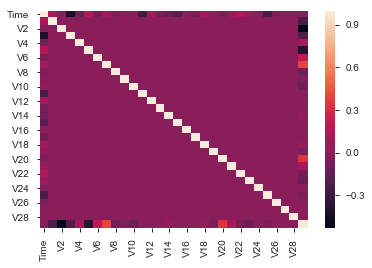

In [42]:
#Nothing is highly correlated
sns.heatmap(featcor)

In [44]:
X = feat
y = target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [142]:
# Function to show importance of each feature
def plot_feature_importances(model):
    '''plots the importance of each feature.  Useful for something like KNN so you can tell which features are useful '''
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), X_train.columns.values)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")


## First try at Random Forests

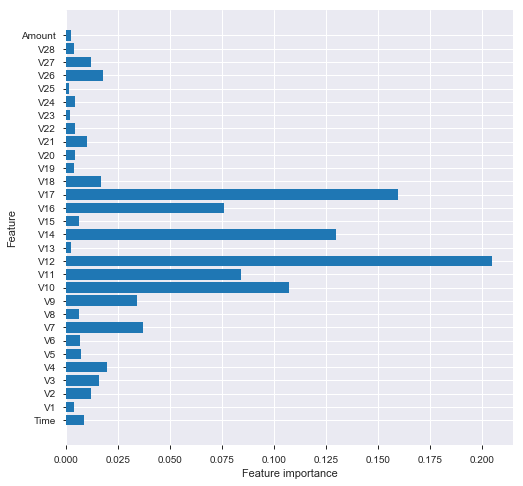

In [103]:
#First try at Random Forests
# Random Forest in code
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)
forest.score(X_train, y_train) # Accuracy of training data
forest.score(X_test, y_test) # Accuracy of test data

plot_feature_importances(forest) # plot using function above

In [51]:
print('Train Forest Score: ', forest.score(X_train, y_train)) # Accuracy of training data
print('Test Forest Score:', forest.score(X_test, y_test))

Train Forest Score:  0.9995335918666807
Test Forest Score: 0.9995105706108292


In [55]:
forest_pred = forest.predict(X_test)

In [56]:
print(confusion_matrix(y_test, forest_pred))
print('/n')
print(classification_report(y_test, forest_pred))

[[93823     7]
 [   39   118]]
/n
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93830
           1       0.94      0.75      0.84       157

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.97      0.88      0.92     93987
weighted avg       1.00      1.00      1.00     93987



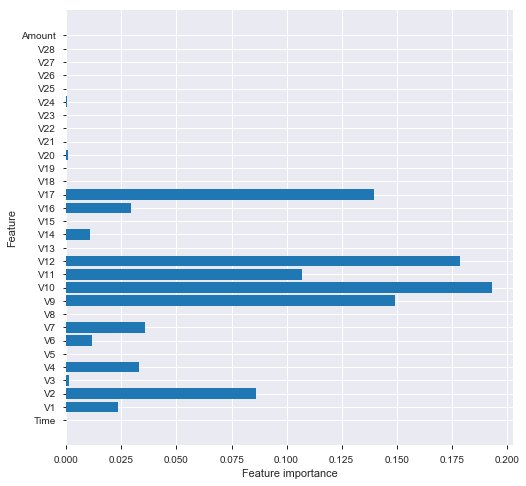

In [50]:
# Fine Tune the model
forest_2 = RandomForestClassifier(n_estimators = 10, max_features=2, max_depth= 2)
forest_2.fit(X_train, y_train)
forest_2.score(X_train, y_train) # Accuracy of training data
forest_2.score(X_test, y_test)  # Accuracy of test data

plot_feature_importances(forest_2)

In [52]:
print('Train Forest_2 Score: ', forest_2.score(X_train, y_train)) # Accuracy of training data
print('Test Forest_2 Score:', forest_2.score(X_test, y_test))

Train Forest_2 Score:  0.9988523215595849
Test Forest_2 Score: 0.9988721844510411


In [57]:
forest_2_pred = forest_2.predict(X_test)

In [58]:
print(confusion_matrix(y_test, forest_pred))
print('/n')
print(classification_report(y_test, forest_pred))

[[93823     7]
 [   39   118]]
/n
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93830
           1       0.94      0.75      0.84       157

   micro avg       1.00      1.00      1.00     93987
   macro avg       0.97      0.88      0.92     93987
weighted avg       1.00      1.00      1.00     93987



In [76]:
pip install -U imbalanced-learn

    100% |████████████████████████████████| 174kB 3.5MB/s ta 0:00:01
    100% |████████████████████████████████| 10.5MB 1.8MB/s ta 0:00:01
  Found existing installation: scikit-learn 0.20.3
    Uninstalling scikit-learn-0.20.3:
      Successfully uninstalled scikit-learn-0.20.3
Note: you may need to restart the kernel to use updated packages.


In [104]:
#weighted random forest
w = 100 # The weight for the positive class
RF = RandomForestClassifier(class_weight={0: 1, 1: w})

In [105]:
RF.fit()

RecursionError: maximum recursion depth exceeded

In [118]:
rtc = RandomForestClassifier()

param_grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [1, 2, 5, 10],
    "min_samples_split": [2, 5, 10, 20]
}

gs_tree = GridSearchCV(rtc, param_grid, cv=3)
gs_tree.fit(X_train, y_train)

gs_tree.best_params_


{'criterion': 'gini', 'max_depth': 10, 'min_samples_split': 5}

In [122]:
print('Train gs_tree Score: ', gs_tree.score(X_train, y_train)) # Accuracy of training data
print('Test gs_tree Score:', gs_tree.score(X_test, y_test))

Train gs_tree Score:  0.999690808091395
Test gs_tree Score: 0.9995424899188186


In [123]:
gs_tree_pred = gs_tree.predict(X_test)

In [124]:
print(confusion_matrix(y_test, gs_tree_pred))
print('/n')
print(classification_report(y_test, gs_tree_pred))

[[93820    10]
 [   33   124]]
/n
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     93830
           1       0.93      0.79      0.85       157

    accuracy                           1.00     93987
   macro avg       0.96      0.89      0.93     93987
weighted avg       1.00      1.00      1.00     93987



In [ ]:
#using values from grid search
#Continued to error out using values from grid search
rtc = RandomForestClassifier()
param_grid = {'criterion': ['gini', 'gini'], 'max_depth': [10, 10], 'min_samples_split': [5, 5]}
gs_best = GridSearchCV(rtc, param_grid, cv=3)
gs_best.fit(X_train, y_train)


In [137]:
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.datasets import make_classification

In [138]:
X, y = make_classification(n_samples=1000, n_informative=4, random_state=101)

In [140]:
brf = BalancedRandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=5)

In [141]:
brf.fit(X_train, y_train)

RecursionError: maximum recursion depth exceeded

In [115]:
brf_y_pred = brf.predict(X_test)

In [139]:


print('Balanced Random Forest Accuracy Score: ', balanced_accuracy_score(y_test, y_pred))
print('\n')
print('Balanced Random Forest Feature Importances: ', brf.feature_importances_)


NotFittedError: This BalancedRandomForestClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [81]:
X, y = make_classification(n_samples=1000, n_classes=3, n_informative=4, weights=[0.2, 0.3, 0.5], random_state=42)

In [90]:
clf = BalancedRandomForestClassifier(max_depth=1, random_state=42)

In [91]:
clf.fit(X, y)  # doctest: +ELLIPSIS

RecursionError: maximum recursion depth exceeded

In [ ]:


>>> X, y = make_classification(n_samples=1000, n_classes=3,
...                            n_informative=4, weights=[0.2, 0.3, 0.5],
...                            random_state=0)
>>> clf = BalancedRandomForestClassifier(max_depth=2, random_state=0)
>>> clf.fit(X, y)  # doctest: +ELLIPSIS
BalancedRandomForestClassifier(...)
>>> print(clf.feature_importances_)  # doctest: +ELLIPSIS
[...]
>>> print(clf.predict([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
...                     0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]))
[1]


In [ ]:
#First try at Random Forests
# Random Forest in code
forest = RandomForestClassifier(n_estimators=100, max_depth= 5)
forest.fit(X_train, y_train)
forest.score(X_train, y_train) # Accuracy of training data
forest.score(X_test, y_test) # Accuracy of test data
plot_feature_importances(forest) # plot using function above

# Fine Tune the model
forest_2 = RandomForestClassifier(n_estimators = 10, max_features= 2, max_depth= 2)
forest_2.fit(X_train, y_train)
forest_2.score(X_train, y_train) # Accuracy of training data
forest_2.score(X_test, y_test)  # Accuracy of test data

# Use GridsearchCV to find the best Number
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [30, 100, 300], 'min_samples_split': [2, 4, 6], 'min_samples_leaf': [2, 4, 6]}
gs = GridSearchCV(estimator = rfc, param_grid, cv=5)
gs.fit(X_train, y_train)
print('Mean accuracy on the given test data and labels:', gs.score(X_test, y_test))
print('The best parameters are:', gs.best_params_)